In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set_style('darkgrid')

In [4]:
import nltk
import re

In [125]:
df = pd.read_csv('modelSelection/mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [6]:
test = df['posts'][0]

In [7]:
re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 'link', test)

"'link|||link|||enfp and intj moments  link  sportscenter not top ten plays  link  pranks|||What has been the most life-changing experience in your life?|||link   link  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   link|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  link  link ...|||Welcome and stuff.|||link  Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive

In [126]:
df['curated_post'] = df['posts'].apply(lambda x:re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', x))

In [127]:
df['curated_post'] = df['curated_post'].apply(lambda x: re.sub('\|\|\|',' ',x))

In [128]:
df.head()

,type,posts,curated_post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,' enfp and intj moments sportscenter no...
1,ENTP,'I'm finding the lack of me in these posts ver...,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...,"'Good one _____ Of course, to which I say..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...,'You're fired. That's another silly misconcept...


In [11]:
df.groupby('type').agg({'type':'count'})

,type
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


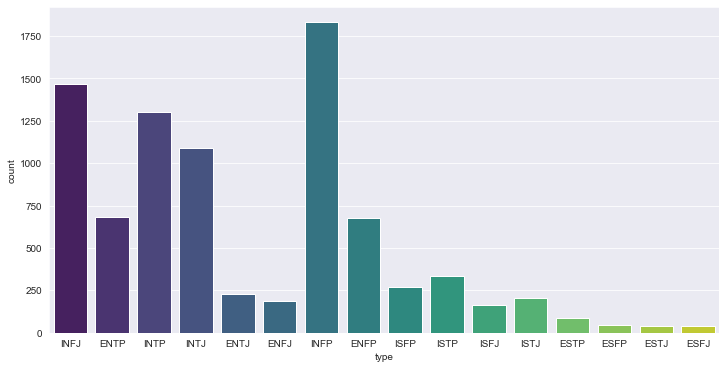

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='type',data=df, palette='viridis')

In [15]:
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS

In [14]:
df['type'].unique()

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

## Data Cleaning process

* Removing links from the features
* Removing types
* Removing Stop Words
* Stemming the words

In [72]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mehulnagpurkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [132]:
df['gold_post'] = df['curated_post'].apply(lambda x: nltk.word_tokenize(x))

In [75]:
from nltk.corpus import stopwords

In [76]:
porter = nltk.PorterStemmer()

In [133]:
# porter.stem(token)
df['gold_post'] = df['gold_post'].apply(lambda x: [porter.stem(i) for i in x])

In [102]:
stop_list = set(stopwords.words('english'))

In [86]:
list_of_personality = list(df['type'].unique())

In [96]:
list(stop_list).append(list_of_personality)

In [99]:
check_list = []

for i in list_of_personality:
    check_list.append(i.lower())
    
for i in stop_list:
    check_list.append(i.lower())

In [101]:
len(check_list)

195

In [134]:
df['gold_post'] = df['gold_post'].apply(lambda x: [i for i in x if i not in check_list and len(i)>0])

In [135]:
df.head()

,type,posts,curated_post,gold_post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,' enfp and intj moments sportscenter no...,"[', moment, sportscent, top, ten, play, prank,..."
1,ENTP,'I'm finding the lack of me in these posts ver...,'I'm finding the lack of me in these posts ver...,"[', I, 'm, find, lack, post, veri, alarm, ., s..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,"'Good one _____ Of course, to which I say...","['good, one, _____, Of, cours, ,, I, say, I, k..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'Dear INTP, I enjoyed our conversation the o...","['dear, ,, I, enjoy, convers, day, ., esoter, ..."
4,ENTJ,'You're fired.|||That's another silly misconce...,'You're fired. That's another silly misconcept...,"['you, 're, fire, ., 's, anoth, silli, misconc..."


In [ ]:
# fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,10*len(df['type'].unique())))

# k = 0
# for i in df['type'].unique():
#     df_4 = df[df['type'] == i]
#     wordcloud = WordCloud().generate(df_4['posts'].to_string())
#     ax[k].imshow(wordcloud)
#     ax[k].set_title(i)
#     ax[k].axis("off")
#     k+=1

(-0.5, 399.5, 199.5, -0.5)

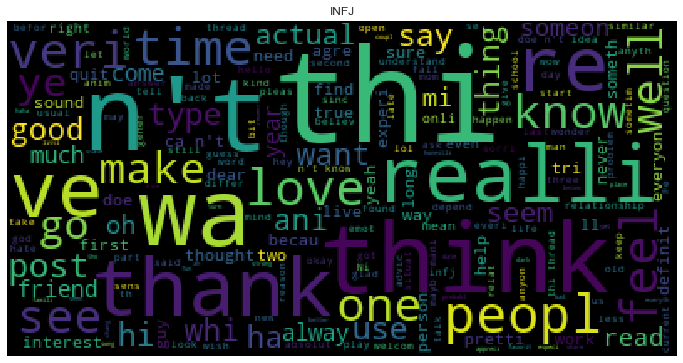

In [108]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()


i = 'INFJ'
df_4 = df[df['type'] == i]
wordcloud = WordCloud().generate(df_4['curated_post'].to_string())
ax.imshow(wordcloud)
ax.set_title(i)
ax.axis("off")

(-0.5, 399.5, 199.5, -0.5)

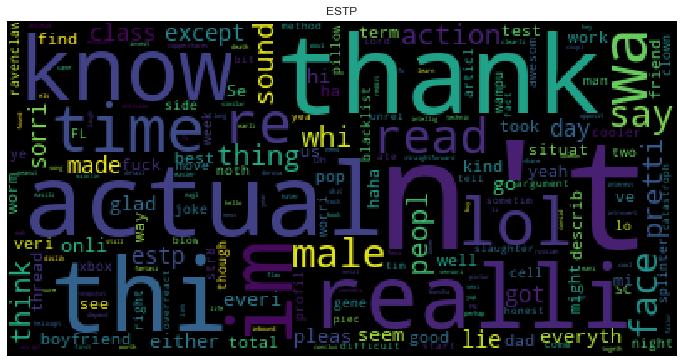

In [109]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()


i = 'ESTP'
df_4 = df[df['type'] == i]
wordcloud = WordCloud().generate(df_4['curated_post'].to_string())
ax.imshow(wordcloud)
ax.set_title(i)
ax.axis("off")

In [ ]:
# Encode each type to an int

from sklearn.preprocessing import LabelEncoder

unique_type_list = list(df['type'].unique())

lab_encoder = LabelEncoder().fit(unique_type_list)

In [32]:
# deciding target and feature labels

In [129]:
X = df['curated_post']
y = df['type']

## Naive Bayes Classifier

In [111]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

In [112]:
from sklearn.model_selection import train_test_split

In [130]:
# splitting the training and test set, 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [114]:
from sklearn.pipeline import Pipeline

In [49]:
# Using the pipeline method
# 1. Using count vectorizer to create a sparse matrix
# 2. Transforming using TFID Transformer
# 3. Using a Multinomial classifier

In [115]:
pipline = Pipeline([
    ('vector',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('Classifier',MultinomialNB())
])

In [131]:
pipline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('Classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [50]:
predictions = pipline.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print(confusion_matrix(y_test,predictions))

[[  0   0   0   0   0   0   0   0   0  52   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 204   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  77   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 193   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   9   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  17   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  24   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 435   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 531   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 323   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 411   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  55   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  79   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  67   0   0   0   0   0 

In [53]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        52
        ENFP       0.00      0.00      0.00       204
        ENTJ       0.00      0.00      0.00        77
        ENTP       0.00      0.00      0.00       193
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        17
        ESTJ       0.00      0.00      0.00        15
        ESTP       0.00      0.00      0.00        24
        INFJ       0.00      0.00      0.00       435
        INFP       0.20      1.00      0.34       531
        INTJ       0.00      0.00      0.00       323
        INTP       0.00      0.00      0.00       411
        ISFJ       0.00      0.00      0.00        55
        ISFP       0.00      0.00      0.00        79
        ISTJ       0.00      0.00      0.00        67
        ISTP       0.00      0.00      0.00       111

    accuracy                           0.20      2603
   macro avg       0.01   

/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [121]:
nb = MultinomialNB()

In [124]:
#nb.fit(X_train, y_train)

In [58]:
from collections import defaultdict

dd = defaultdict(int)

for pred in predictions:
    dd[pred] += 1

In [59]:
dd

defaultdict(int, {'INFP': 2603})

In [63]:
len(X_train)

6072

In [64]:
len(X_test)

2603

## Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
pipline_rf = Pipeline([
    ('vector',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('Classifier',RandomForestClassifier())
])

In [67]:
pipline_rf.fit(X_train,y_train)

/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=N...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

In [68]:
predictions = pipline_rf.predict(X_test)

In [69]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        ENFJ       0.11      0.02      0.03        52
        ENFP       0.14      0.12      0.13       204
        ENTJ       0.33      0.10      0.16        77
        ENTP       0.18      0.19      0.18       193
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        17
        ESTJ       0.00      0.00      0.00        15
        ESTP       0.00      0.00      0.00        24
        INFJ       0.30      0.48      0.37       435
        INFP       0.32      0.54      0.40       531
        INTJ       0.17      0.12      0.14       323
        INTP       0.33      0.26      0.29       411
        ISFJ       0.00      0.00      0.00        55
        ISFP       0.00      0.00      0.00        79
        ISTJ       0.00      0.00      0.00        67
        ISTP       0.53      0.08      0.14       111

    accuracy                           0.28      2603
   macro avg       0.15   

/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [70]:
dd = defaultdict(int)

for pred in predictions:
    dd[pred] += 1

In [71]:
dd

defaultdict(int,
            {'INFJ': 704,
             'INFP': 911,
             'INTP': 316,
             'ENTP': 202,
             'ENFP': 183,
             'INTJ': 227,
             'ISTP': 17,
             'ISFJ': 4,
             'ENTJ': 24,
             'ENFJ': 9,
             'ISTJ': 1,
             'ISFP': 2,
             'ESTP': 2,
             'ESFJ': 1})

## Trying to train on gold post

In [145]:
df['gold2_post'] = df['gold_post'].apply(lambda x: ' '.join(x))

In [146]:
df.head()

,type,posts,curated_post,gold_post,gold2_post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,' enfp and intj moments sportscenter no...,"[', moment, sportscent, top, ten, play, prank,...",' moment sportscent top ten play prank ha life...
1,ENTP,'I'm finding the lack of me in these posts ver...,'I'm finding the lack of me in these posts ver...,"[', I, 'm, find, lack, post, veri, alarm, ., s...",' I 'm find lack post veri alarm . sex bore 's...
2,INTP,'Good one _____ https://www.youtube.com/wat...,"'Good one _____ Of course, to which I say...","['good, one, _____, Of, cours, ,, I, say, I, k...","'good one _____ Of cours , I say I know ; 's b..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'Dear INTP, I enjoyed our conversation the o...","['dear, ,, I, enjoy, convers, day, ., esoter, ...","'dear , I enjoy convers day . esoter gab natur..."
4,ENTJ,'You're fired.|||That's another silly misconce...,'You're fired. That's another silly misconcept...,"['you, 're, fire, ., 's, anoth, silli, misconc...",'you 're fire . 's anoth silli misconcept . ap...


In [151]:
X_gold = df['gold2_post']
y = df['type']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_gold, y, test_size=0.3)

In [150]:
pipline_v2 = Pipeline([
    ('vector',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('Classifier',MultinomialNB())
])

In [153]:
pipline_v2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('Classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [154]:
predictions_v2 = pipline_v2.predict(X_test)

In [155]:
print(classification_report(y_test, predictions_v2))

              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        58
        ENFP       0.00      0.00      0.00       185
        ENTJ       0.00      0.00      0.00        71
        ENTP       0.00      0.00      0.00       203
        ESFJ       0.00      0.00      0.00        13
        ESFP       0.00      0.00      0.00        14
        ESTJ       0.00      0.00      0.00        10
        ESTP       0.00      0.00      0.00        31
        INFJ       0.00      0.00      0.00       439
        INFP       0.22      1.00      0.36       568
        INTJ       0.00      0.00      0.00       344
        INTP       0.00      0.00      0.00       393
        ISFJ       0.00      0.00      0.00        51
        ISFP       0.00      0.00      0.00        81
        ISTJ       0.00      0.00      0.00        52
        ISTP       0.00      0.00      0.00        90

    accuracy                           0.22      2603
   macro avg       0.01   

/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [156]:
dd = defaultdict(int)

for pred in predictions_v2:
    dd[pred] += 1
    
dd

defaultdict(int, {'INFP': 2602, 'INFJ': 1})

In [161]:
pipline_v3 = Pipeline([
    ('vector',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('Classifier',RandomForestClassifier(n_estimators=100))
])

In [162]:
pipline_v3.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=N...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

In [163]:
predictions_v3 = pipline_v3.predict(X_test)

In [164]:
print(classification_report(y_test, predictions_v3))

              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        58
        ENFP       0.50      0.01      0.02       185
        ENTJ       0.00      0.00      0.00        71
        ENTP       0.33      0.02      0.04       203
        ESFJ       0.00      0.00      0.00        13
        ESFP       0.00      0.00      0.00        14
        ESTJ       0.00      0.00      0.00        10
        ESTP       0.00      0.00      0.00        31
        INFJ       0.24      0.31      0.27       439
        INFP       0.30      0.79      0.43       568
        INTJ       0.38      0.13      0.19       344
        INTP       0.32      0.31      0.32       393
        ISFJ       0.00      0.00      0.00        51
        ISFP       0.00      0.00      0.00        81
        ISTJ       0.00      0.00      0.00        52
        ISTP       0.00      0.00      0.00        90

    accuracy                           0.29      2603
   macro avg       0.13   

/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [165]:
dd = defaultdict(int)

for pred in predictions_v3:
    dd[pred] += 1
    
dd

defaultdict(int,
            {'INFP': 1511,
             'INTP': 376,
             'INTJ': 118,
             'INFJ': 580,
             'ENTP': 12,
             'ENFP': 4,
             'ISFJ': 2})

## K Nearest Neighbours Classifier

In [166]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
pipline_k = Pipeline([
    ('vector',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('Classifier',KNeighborsClassifier(n_neighbors=16))
])

In [175]:
pipline_k.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('Classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=No

In [176]:
predictions_k = pipline_k.predict(X_test)

In [177]:
print(classification_report(y_test, predictions_k))

              precision    recall  f1-score   support

        ENFJ       0.17      0.03      0.06        58
        ENFP       0.14      0.20      0.17       185
        ENTJ       0.00      0.00      0.00        71
        ENTP       0.04      0.00      0.01       203
        ESFJ       0.00      0.00      0.00        13
        ESFP       0.00      0.00      0.00        14
        ESTJ       0.00      0.00      0.00        10
        ESTP       0.00      0.00      0.00        31
        INFJ       0.19      0.55      0.28       439
        INFP       0.26      0.39      0.31       568
        INTJ       0.24      0.09      0.13       344
        INTP       0.43      0.05      0.09       393
        ISFJ       0.00      0.00      0.00        51
        ISFP       0.00      0.00      0.00        81
        ISTJ       0.75      0.06      0.11        52
        ISTP       0.00      0.00      0.00        90

    accuracy                           0.21      2603
   macro avg       0.14   

/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [178]:
dd = defaultdict(int)

for pred in predictions_k:
    dd[pred] += 1
    
dd

defaultdict(int,
            {'INFJ': 1269,
             'INFP': 849,
             'ENFP': 256,
             'ENTP': 27,
             'INTJ': 128,
             'ISTJ': 4,
             'ENFJ': 12,
             'INTP': 44,
             'ISTP': 10,
             'ISFJ': 3,
             'ESFJ': 1})

In [182]:
len(X_test)

2603

In [183]:
len(X_train)

6072

In [188]:
cv = CountVectorizer()

In [189]:
X_vector = cv.fit_transform(X_train)

In [192]:
X_vector.shape

(6072, 70466)

In [197]:
type(X_vector)

scipy.sparse.csr.csr_matrix

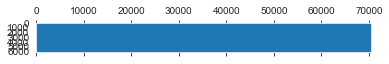

In [198]:
plt.spy(X_vector)

In [201]:
df['posts'][0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...